September 6, 2020
1. app data need to be divided into major sectors
    This is because after reading literature, you find different sectors follow different patterns and no previous paper write
    an entire paper on all-encompassing internet economy.

You could consider bringing in other data.

In [1]:
# import packages and define path
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from pathlib import Path
import numpy as np
from google_play_scraper import app
from tqdm import tqdm
# run python scripts containing all the functions
%run -i '0_paths.py'
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
%run -i '3_tables.py'

In [9]:
# CELL 1: OPEN AN PICKLE FILE, EXTRACT APP IDs
%run -i '1_functions_scraping_data.py'
# open an old dataset for tracking
q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / "202002" / "ALL_APP_DETAILS_202002.pickle"
with open(q, 'rb') as filename:
    C = pickle.load(filename)

# get the unique id list from the old data
id_list = get_id_from_data_beofre_202009(C)
print(id_list)
print(len(id_list))

['com.finazzi.distquake', 'com.honeyponey.bubbletea', 'com.thomasbowker.lynerelease', 'com.planeth.rhythm', 'com.PSV.Baby_Cooking_School', 'com.candyrufusgames.survivalcraft2', 'com.biogen.cleo.us', 'com.exatools.skitracker', 'com.tribeplay.pandaspace', 'com.sbi.SBIFreedomPlus', 'com.plarium.vikings', 'com.whaleapp.hotelblast', 'com.noodlecake.punchquest', 'com.zvooq.openplay', 'com.solou.catendless.run', 'com.popularapp.periodcalendar', 'com.philseven.loyalty', 'com.fifa.fifaapp.android', 'com.pixel.coloring.color.by.number', 'com.snagajob.jobseeker', 'com.wordsmobile.golfchampionship', 'com.mcprohosting.beam', 'com.tiimoapp.androidapp', 'com.chuchutv.android', 'com.mapmyride.android2', 'com.bluewizard.slayawaycamp', 'com.lucky.notewidget', 'com.infinitewallpapers.popular.brands.wallpapers', 'com.oki.colorsnew', 'com.hoteltonight.android.prod', 'com.americanwell.android.member.amwell', 'com.savingstar.SavingStar', 'com.zeptolab.timetravel.free.google', 'com.coffeestainstudios.goatsimu

In [10]:
# CELL 2: EXTRACTED APP DETAILS ACCORDING TO THE IDS FROM CELL 1, START SCRAPING and SAVE
%run -i '1_functions_scraping_data.py'
# scraping app details according to id
app_details = scraping_apps_according_to_id(id_list)
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202012" / "TRACKING_202002.pickle"
pickle.dump(app_details, open(q,'wb'))

scraping...: 100%|██████████| 8042/8042 [1:18:41<00:00,  1.70it/s]    


In [13]:
q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / "202012" / "TRACKING_202002.pickle"
with open(q, 'rb') as filename:
    M = pickle.load(filename)
M_i = np.random.randint(low = 0, high = len(M), size=1)[0]
print(M_i)
print(id_list[M_i])
print(M[id_list[M_i]])

1759
com.medefy.epestransport
{'title': 'EPES Benefits', 'description': 'All of your EPES health benefits in one easy-to-access place! Need care, but not sure where to start? Start here!\r\n\r\nSaving money on healthcare and navigating health benefits, insurance, and healthcare can be hard, but the new EPES health benefits app makes it easy! Have a question about your health benefits or what’s covered? Need help scheduling an appointment? Want easy access to FREE medical services? Text your friendly EPES Health Benefits Care Guide in the app- we can help!\r\n \r\nPlus, the EPES health benefits app has everything you need to utilize your employer health benefits in one easy to access place:\r\n \r\nChat with a Care Guide - confused about your health benefits, what’s covered, a recent healthcare bill, or where you can go for FREE medical care? Text with us in the app, we’re ready to help answer questions and connect you to care! Ready to schedule? Our friendly in-app Guides can help with

In [2]:
# CELL 3: CONVERT INITIAL DATA INTO DATAFRAME
# load all the data scraped before 202009 and convert them to dictionaries with appid as keys
# and save them into __PANELS__ folder (subfolders are named according to the initial month the panel is scraped)
# the original scraped data are stored in "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" (subfolders are named according to the month
# the data is scraped).
### First convert all the initial panels into appid as key and as dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

for i in ["201812", '201907', '201908', '201912', '202001', '202002']:
    filename = 'ALL_APP_DETAILS_' + i + '.pickle'
    q = input_path / "NEW_ALGORITHM_MONTHLY_SCRAPE" / i / filename
    with open(q, 'rb') as f:
        C = pickle.load(f)
    D = convert_list_data_to_dict_with_appid_keys(C)
    E = transform_old_scraper_dict_dataframe(D, i)

    filename = 'INITIAL_' + i + '.pickle'
    folder_name = i + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(E, open(q,'wb'))

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future

In [3]:
# CELL 4: CONVERT ALL THE TRACKING DATA INTO DATAFRAME
### second convert all the tracking datasets before 202009 into dataframe
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'

# key represents initial panel, value represents panels tracking the initial panel
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201912':['202001', '202003', '202004', '202009', '202010', '202011'],
'202001':['202003', '202004', '202009', '202010', '202011'],
'202002':['202004', '202009', '202010', '202011']}

for i, months in panels_track.items():
    for j in months:
        # because since 202003 I started using the new scraper
        if j not in ['202003', '202004', '202009', '202010', '202011']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_old_scraper_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        elif j in ['202003', '202004']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            D = convert_list_data_to_dict_with_appid_keys(C)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))
        # because since 202009 I started using appid as key in scraping stage, so I do not need to convert from list to dictionary first
        elif j in ['202009', '202010', '202011']:
            filename = 'TRACKING_' + i + '.pickle'
            q = input_path / "TRACKING_THE_SAME_ID_MONTHLY_SCRAPE" / j / filename
            with open(q, 'rb') as f:
                C = pickle.load(f)
            E = transform_dict_dataframe(D, j)
            filename = j + '_PANEL' + '.pickle'
            folder_name = i + '_PANEL_DF'
            q = input_path / "__PANELS__" / folder_name / filename
            pickle.dump(E, open(q,'wb'))


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  E[['IAP_low', 'IAP_high']] = E['inAppProductPrice'].apply(lambda x: pd.Series(x))
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:154: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future

after dropping rows all NA in all columns, the non-missing values in each column  title_202003                            4809
description_202003                      4809
summary_202003                          4809
installs_202003                         4809
minInstalls_202003                      4809
score_202003                            4797
ratings_202003                          4797
reviews_202003                          4797
histogram_202003                        4350
price_202003                            4809
currency_202003                         4809
size_202003                             4809
androidVersion_202003                   4805
androidVersionText_202003               4809
developer_202003                        4809
developerId_202003                      4809
developerEmail_202003                   4809
developerWebsite_202003                 4010
developerAddress_202003                 3026
privacyPolicy_202003                    4227
developerInternalI

In [4]:
# CELL 5: MERGE ALL THE CONVERTED DATAFRAMES INTO A SINGLE DATAFRAME
%run -i '1_functions_scraping_data.py'
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201912':['202001', '202003', '202004', '202009', '202010', '202011'],
'202001':['202003', '202004', '202009', '202010', '202011'],
'202002':['202004', '202009', '202010', '202011']}

for k, v in panels_track.items():
    final_panel = merge_dataframes_panels(k, v)

    filename = k + '_MERGED' + '.pickle'
    folder_name = k + '_PANEL_DF'
    q = input_path / "__PANELS__" / folder_name / filename
    pickle.dump(final_panel, open(q,'wb'))


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/2_functions_data_visualization.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C[i] = C[i].astype(float)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 


<Figure size 460.8x316.8 with 0 Axes>

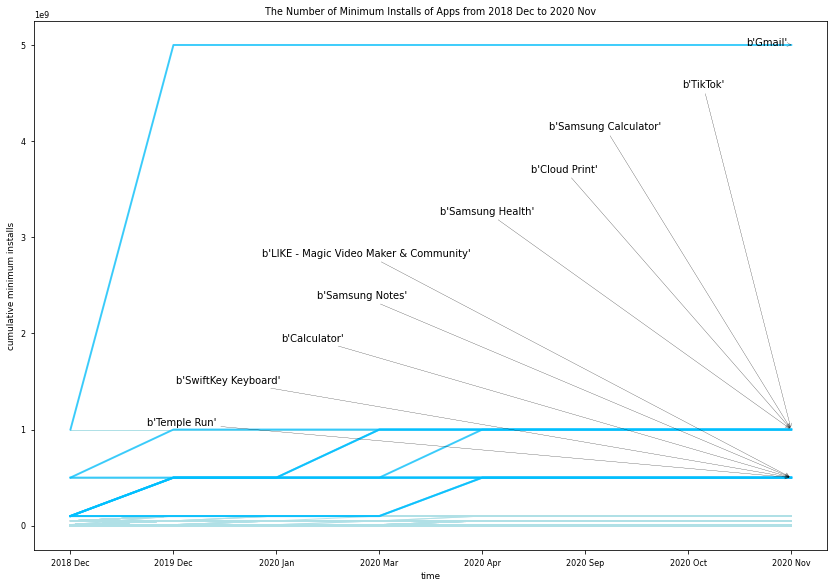

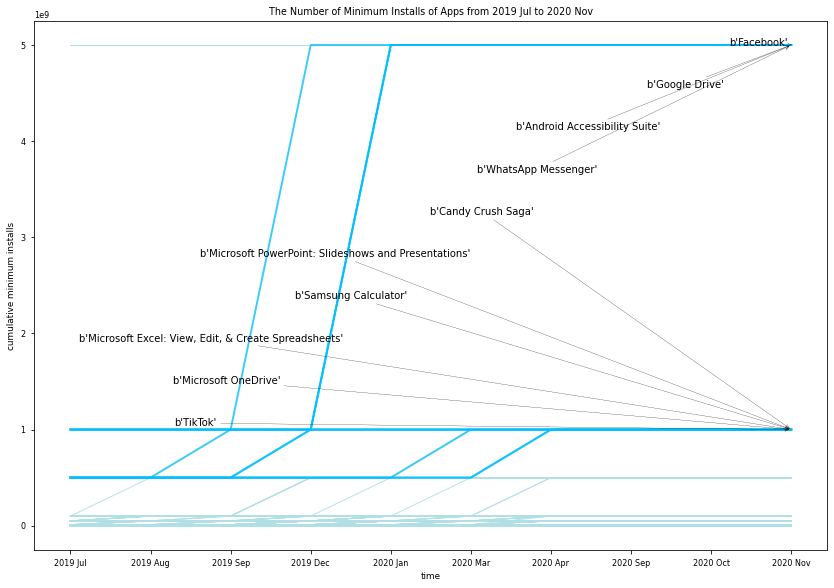

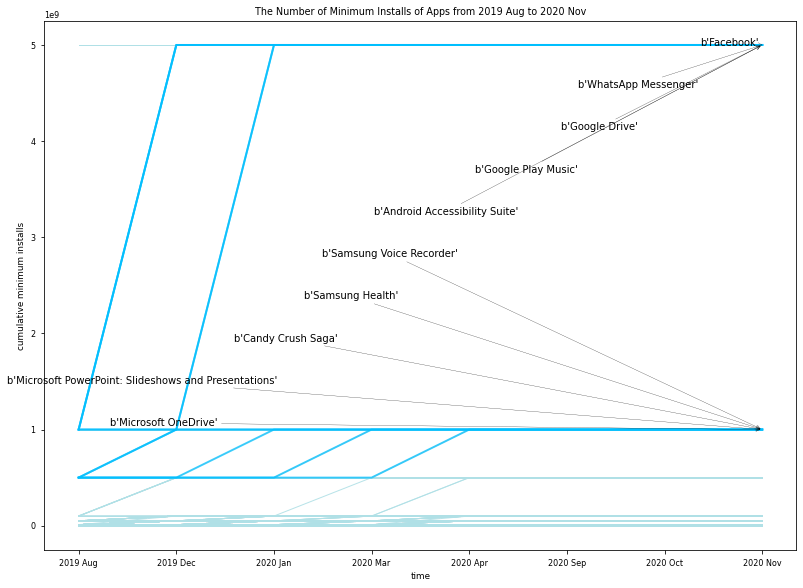

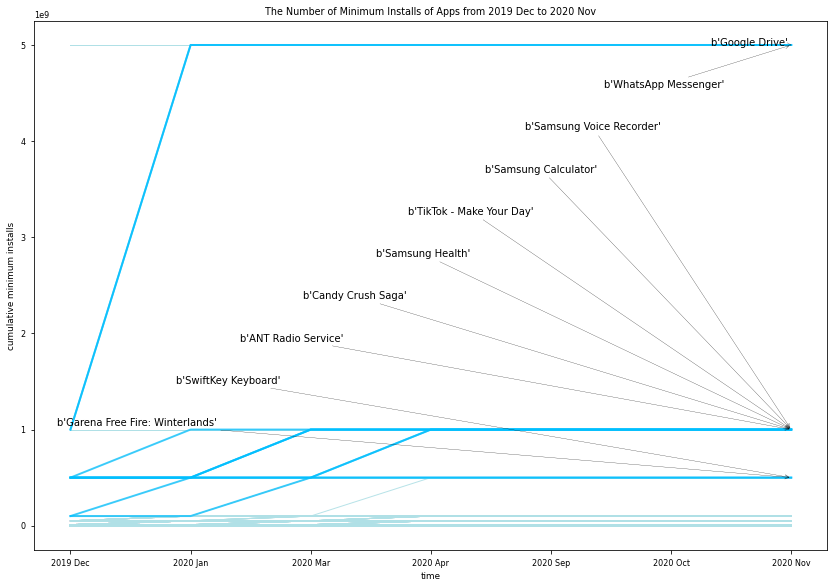

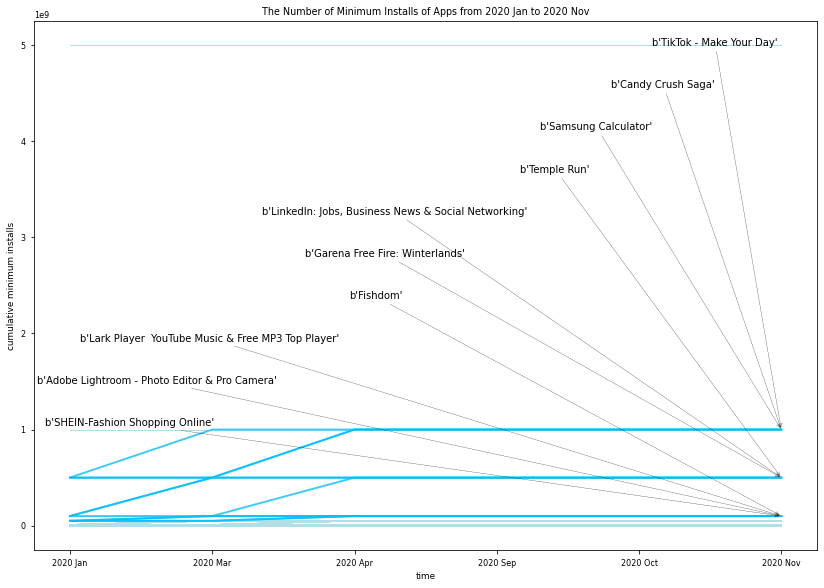

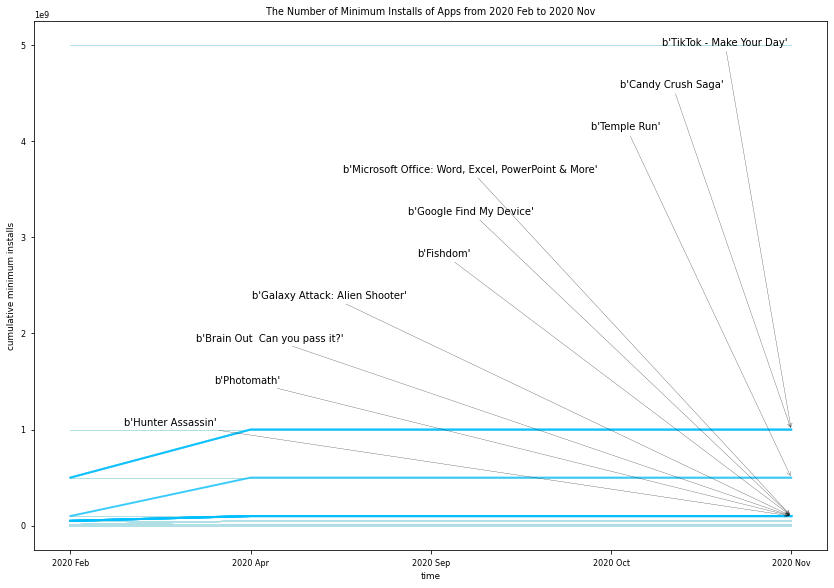

In [7]:
# CELL 6: MinInstalls for all the panels (complete sample)
%run -i '0_paths.py'
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201912':['202001', '202003', '202004', '202009', '202010', '202011'],
'202001':['202003', '202004', '202009', '202010', '202011'],
'202002':['202004', '202009', '202010', '202011']}
for initial_date, panels in panels_track.items():
    C, top_performers = dataframe_for_line_plot(initial_date = initial_date,
                                                      panels = panels,
                                                      variable = 'minInstalls')
    graph_line_plots(C,
                     initial_date = initial_date,
                     panels = panels,
                     variable ='minInstalls',
                     top_performers = top_performers)


In [59]:
# (I feel this is not quite useful, so you do not have to run this every time you scraped a new panel)
# CELL 7.1: SUBSET DATAFRAME (CREATE NEW DICTIONARY AND SAVE)
# DIVIDE AND SAVE DATAFRAMES ACCORDING TO DIFFERENT MIN-INSTALLS (BOTH IN LEVEL AND CHANGE)
# THE QUANTILE DISTRIBUTION HAS BEEN CHECKED AND SAVED AS TABLE USING FUNCTION export_and_save_qauntile_tables
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202010',
'201907':'202010',
'201908':'202010',
'201912':'202010',
'202001':'202010',
'202002':'202010'}
variable = 'minInstalls'
for initial_date, end_date in initial_end_dates.items():
    # divide and save according to the snapshot of variable level at the end date
    DF_dict = divide_dataframe_by_variable_level(initial_date = initial_date,
                                      the_panel = end_date,
                                      variable = variable,
                                      in_place = False)

    # divide and save according to the change in the variable between the initial and end date
    DF_dict = divide_dataframe_by_variable_change(initial_date = initial_date,
                                                  end_date = end_date,
                                                  variable = variable,
                                                  in_place = False)


201812 panel divided according to static minInstalls in 202010
<= 500,000 (2838, 371)

500,000 < .. <= 5,000,000 (1094, 371)

> 5,000,000 (783, 371)

0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7       400.0
0.8     40000.0
0.9    500000.0
Name: change_in_minInstalls, dtype: float64
201812 panel divided according to change in minInstalls between the initial date and 202010
0 (3094, 371)

> 0 (1620, 371)

201907 panel divided according to static minInstalls in 202010
<= 500,000 (4261, 463)

500,000 < .. <= 5,000,000 (2058, 463)

> 5,000,000 (1555, 463)

0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7         0.0
0.8     50000.0
0.9    900000.0
Name: change_in_minInstalls, dtype: float64
201907 panel divided according to change in minInstalls between the initial date and 202010
0 (5606, 463)

> 0 (2268, 463)

201908 panel divided according to static minInstalls in 202010
<= 500,000 (

In [8]:
# CELL 7.2: SUBSET DATAFRAME (IN-PLACE AND SAVE)
# DIVIDE AND SAVE DATAFRAMES ACCORDING TO DIFFERENT MIN-INSTALLS (BOTH IN LEVEL AND CHANGE)
# THE QUANTILE DISTRIBUTION HAS BEEN CHECKED AND SAVED AS TABLE USING FUNCTION export_and_save_qauntile_tables
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202011',
'201907':'202011',
'201908':'202011',
'201912':'202011',
'202001':'202011',
'202002':'202011'}
variable = 'minInstalls'
for initial_date, end_date in initial_end_dates.items():
    # divide and save according to the snapshot of variable level at the end date
    DF = divide_dataframe_by_variable_level(initial_date = initial_date,
                                      the_panel = end_date,
                                      variable = variable,
                                      in_place = True)
    # divide and save according to the change in the variable between the initial and end date
    DF = divide_dataframe_by_variable_change(initial_date = initial_date,
                                              end_date = end_date,
                                              variable = variable,
                                              in_place = True)



201812
<= 500,000                   2838
500,000 < .. <= 5,000,000    1094
> 5,000,000                   783
Name: group_static_minInstalls, dtype: int64
0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7       400.0
0.8     40000.0
0.9    500000.0
Name: change_in_minInstalls, dtype: float64
201812
0      3094
> 0    1620
Name: group_change_minInstalls, dtype: int64
201907
<= 500,000                   4261
500,000 < .. <= 5,000,000    2058
> 5,000,000                  1555
Name: group_static_minInstalls, dtype: int64
0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7         0.0
0.8     50000.0
0.9    900000.0
Name: change_in_minInstalls, dtype: float64
201907
0      5606
> 0    2268
Name: group_change_minInstalls, dtype: int64
201908
<= 500,000                   6862
500,000 < .. <= 5,000,000    3025
> 5,000,000                  2055
Name: group_static_minInstalls, dtype: int64
0.1       

<Figure size 460.8x316.8 with 0 Axes>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


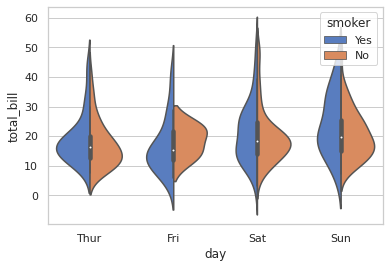

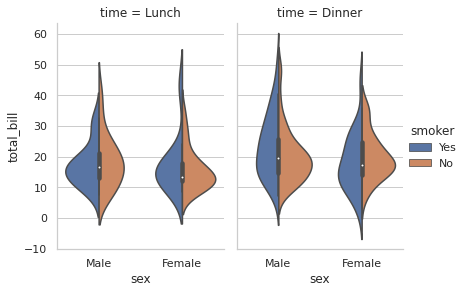

In [4]:
# TEST CELL for seaborn internal dataset
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted", split=True)

g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="violin", split=True,
                height=4, aspect=.7);
pd.options.display.max_columns = None
display(tips)

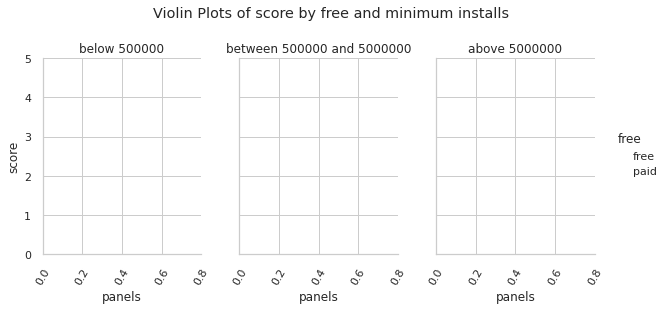

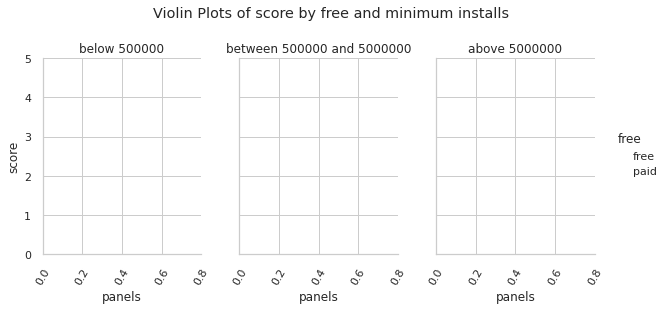

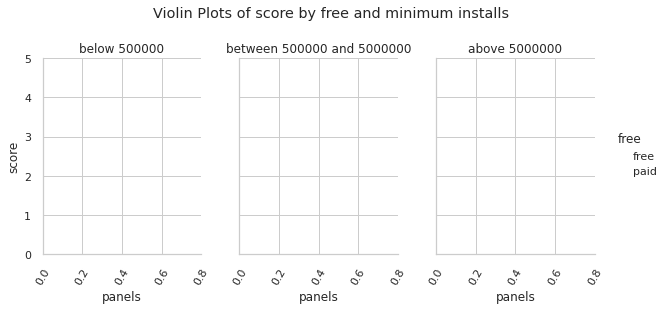

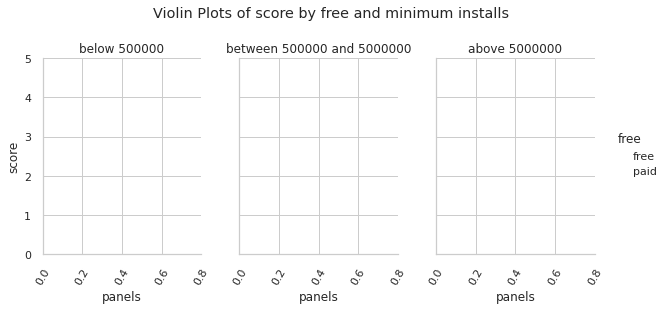

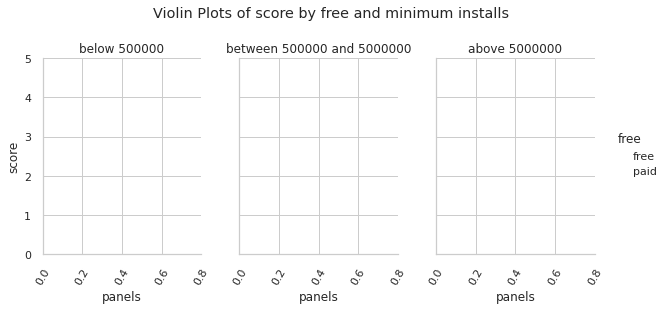

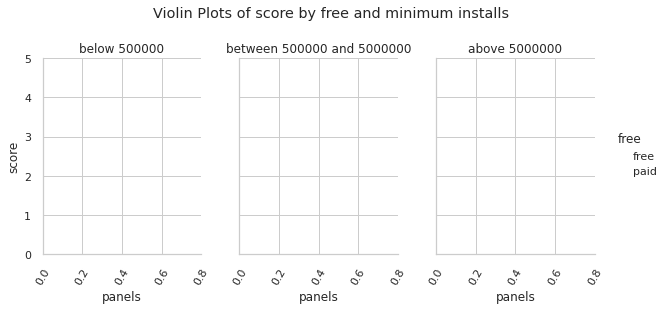

In [11]:
# CELL 8.1: GRAPH SCORE BY FREE AND LEVEL MIN-INSTALLS
# refer back to cell 7.2, the group variable is default to the end panel value
%run -i '2_functions_data_visualization.py'
panels_track = {
'201812':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201908':['201912', '202001', '202003', '202004', '202009', '202010', '202011'],
'201912':['202001', '202003', '202004', '202009', '202010', '202011'],
'202001':['202003', '202004', '202009', '202010', '202011'],
'202002':['202004', '202009', '202010', '202011']}
for initial_date, panels in panels_track.items():
    E = dataframe_for_violin_plots(initial_date = initial_date,
                                   panels = panels,
                                   variable = 'score',
                                   group = 'group_static_minInstalls',
                                   binary = 'free_True',
                                   panel_for_group_and_binary = '202011')

    graph_violin_plots(dataframe = E,
                         x_axis_group = 'panels',
                         y_axis_var = 'score',
                         split_binary = 'free',
                         subplot_var = 'group_static_minInstalls')

<Figure size 432x288 with 0 Axes>

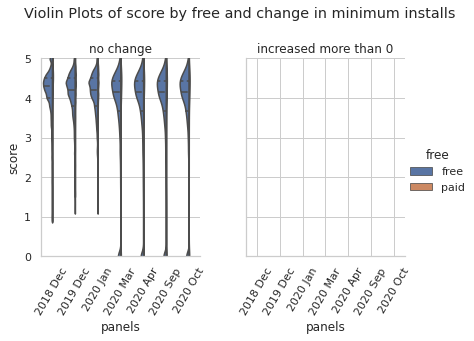

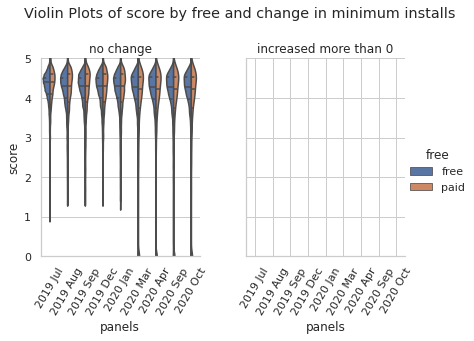

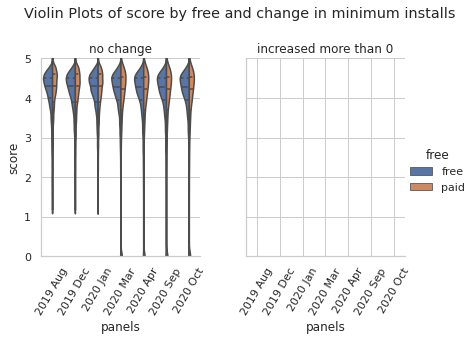

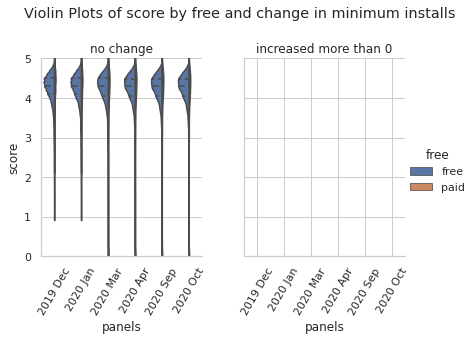

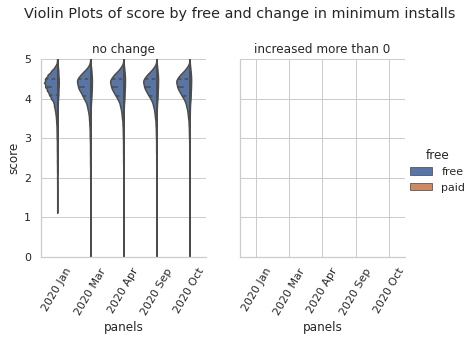

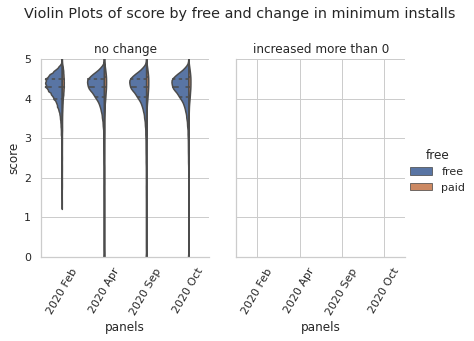

In [21]:
# CELL 8.2: GRAPH SCORE BY FREE AND CHANGE MIN-INSTALLS
# it seems that change in min installs is not suitable for violin plots because the
# number of apps actually have increase in minInstalls are too much fewer than apps with no change in minInstalls
# %run -i '2_functions_data_visualization.py'
# panels_track = {
# '201812':['201912', '202001', '202003', '202004', '202009', '202010'],
# '201907':['201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010'],
# '201908':['201912', '202001', '202003', '202004', '202009', '202010'],
# '201912':['202001', '202003', '202004', '202009', '202010'],
# '202001':['202003', '202004', '202009', '202010'],
# '202002':['202004', '202009', '202010']}
# for initial_date, panels in panels_track.items():
#     E = dataframe_for_violin_plots(initial_date = initial_date,
#                                    panels = panels,
#                                    variable = 'score',
#                                    group = 'subset_df_according_to_change_in_minInstalls_between_' + initial_date + '_and_202010',
#                                    binary = 'free_True',
#                                    panel_for_group_and_binary = '202010')
#
#     graph_violin_plots(dataframe = E,
#                          x_axis_group = 'panels',
#                          y_axis_var = 'score',
#                          split_binary = 'free',
#                          subplot_var = 'subset_df_according_to_change_in_minInstalls_between_' + initial_date + '_and')

In [19]:
# CELL 9.1: descriptive stats by groups (TABLES)
%run -i '3_tables.py'
initial_end_dates = {
'201812':'202011',
'201907':'202011',
'201908':'202011',
'201912':'202011',
'202001':'202011',
'202002':'202011'}
for initial_date, the_panel in initial_end_dates.items():
    K = descriptive_stats_merged_df(
        level_1_var = 'group_static_minInstalls',
        initial_date = initial_date,
        the_panel = the_panel,
        level_2_vars = 'GAME',
        level_3_vars = 'free_True',
        latex = False,
        aggregate_var_1 = 'score',
        aggregate_var_3 = 'reviews',
        aggregate_var_5 = 'price'
        )
    # print(initial_date)
    # print(K.head())
    # print()

stats.norm


<Figure size 432x288 with 0 Axes>

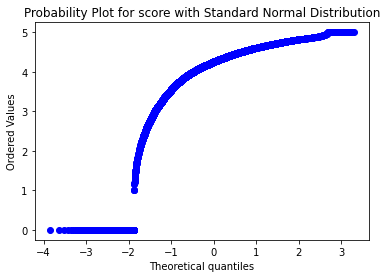

In [13]:
# TEST CELL QQ PLOT
%run -i '2_functions_data_visualization.py'
K = qq_plots(initial_date = '201908',
             variable = 'score',
             the_panel = '202010',
             theoretical_distribution = 'stats.norm')

<Figure size 432x288 with 0 Axes>

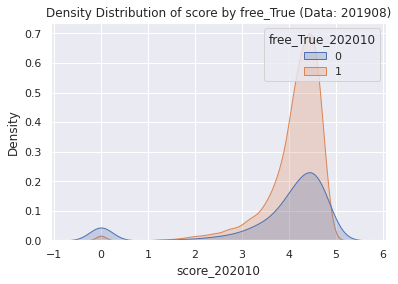

In [24]:
# TEST CELL KDE PLOT
%run -i '2_functions_data_visualization.py'

K = kde_plots(initial_date = '201908',
              variable = 'score',
              #panels = ['201912', '202001', '202003', '202004', '202009', '202010'],
              the_panel = '202010',
              hue = 'free_True')


In [99]:
# https://pypi.org/project/tabulate/
# this is a latex cell
s1 = r"$\leq$"
print(s1)
print('\\')

$\leq$
\


In [73]:
"{:,.2f}".format(100000.0567)
"{:,.2f}".format(100000.0567)

'100,000.06'